<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week02/02_Clasification_Model_CitarumWater_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [134]:
# Load dataset CitarumWater.csv
df = pd.read_csv('/content/CitarumWater.csv')

In [135]:
# Step 2: Preprocess the dataset
# Convert 'Temp' column to string and remove '°C' then convert to float
df['Temp'] = df['Temp'].astype(str).str.replace('°C', '').astype(float)

In [136]:
# Step 3: Select features for classification (drop irrelevant columns)
features = ['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']
# Memilih fitur-fitur yang akan digunakan sebagai variabel independen (X) dalam model
X = df[features].values  # Mengambil nilai dari fitur-fitur dan mengubahnya menjadi array numpy
y = df['Class'].values   # Kolom target (y) yang ingin diprediksi, yaitu kelas kualitas air (misal kelas 2, 3, dsb.)


In [137]:
# Step 4: Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membagi dataset menjadi dua bagian: data training (80%) dan data testing (20%), dengan random_state untuk memastikan pengacakan yang sama setiap kali

In [138]:

# Step 5: Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
# Inisialisasi model Logistic Regression dengan jumlah iterasi maksimal 1000 dan random_state untuk replikasi hasil yang konsisten
model.fit(X_train, y_train)
# Melatih model Logistic Regression pada data training (X_train dan y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [139]:
# Step 6: Predict using the model
y_pred = model.predict(X_test)
# Menggunakan model yang sudah dilatih untuk memprediksi kelas pada data testing (X_test)


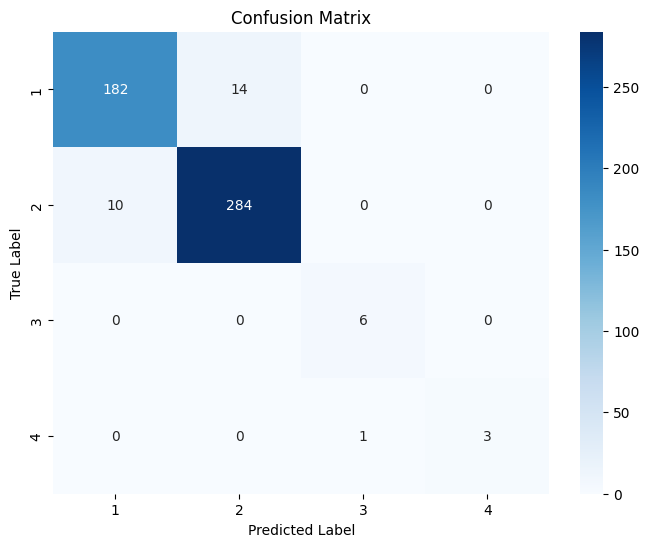

In [140]:
# Step 7: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Menghitung Confusion Matrix yang menunjukkan jumlah prediksi benar dan salah dalam setiap kelas

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [142]:
# Step 8: Evaluate the model
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred) # Menghitung akurasi model (persentase prediksi yang benar)
precision = precision_score(y_test, y_pred, average='weighted') # Menghitung presisi, menggunakan rata-rata tertimbang karena klasifikasi multi-kelas
recall = recall_score(y_test, y_pred, average='weighted') # Menghitung recall, menggunakan rata-rata tertimbang untuk multi-kelas
f1 = f1_score(y_test, y_pred, average='weighted') # Menghitung F1 Score, yang merupakan harmoni antara presisi dan recall, juga dengan rata-rata tertimbang


# Print classification report
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.93      0.94       196
           2       0.95      0.97      0.96       294
           3       0.86      1.00      0.92         6
           4       1.00      0.75      0.86         4

    accuracy                           0.95       500
   macro avg       0.94      0.91      0.92       500
weighted avg       0.95      0.95      0.95       500

Accuracy: 0.9500
Precision: 0.9502
Recall: 0.9500
F1 Score: 0.9498
